<a href="https://colab.research.google.com/github/rjara001/MachineLearning/blob/main/Bombas/Bombas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import xgboost as xgb

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Data/monica.csv', sep=',')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head(10)

,Unnamed: 0,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp
0,1,live,f,63,85,n,x,n,y,y,n,n,y
1,2,live,m,59,85,y,x,n,y,n,n,n,y
2,3,live,m,68,85,n,n,n,y,n,n,n,y
3,4,live,m,46,85,n,c,n,n,n,n,n,y
4,5,dead,m,48,85,n,n,y,n,n,y,n,y
5,6,live,f,55,85,n,c,n,y,y,n,n,y
6,7,live,m,56,85,n,x,n,y,n,n,n,y
7,8,live,f,68,85,y,nk,nk,y,nk,y,n,y
8,9,live,m,69,85,n,n,n,y,y,n,n,y
9,10,live,f,64,85,n,x,n,y,n,y,n,y


In [ ]:

data.isnull().sum()

Unnamed: 0    0
outcome       0
sex           0
age           0
yronset       0
premi         0
smstat        0
diabetes      0
highbp        0
hichol        0
angina        0
stroke        0
hosp          0
dtype: int64

In [ ]:
data = data.drop_duplicates()

data.duplicated().sum()

0

In [ ]:
data.shape

(6367, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6367 entries, 0 to 6366
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6367 non-null   int64 
 1   outcome     6367 non-null   object
 2   sex         6367 non-null   object
 3   age         6367 non-null   int64 
 4   yronset     6367 non-null   int64 
 5   premi       6367 non-null   object
 6   smstat      6367 non-null   object
 7   diabetes    6367 non-null   object
 8   highbp      6367 non-null   object
 9   hichol      6367 non-null   object
 10  angina      6367 non-null   object
 11  stroke      6367 non-null   object
 12  hosp        6367 non-null   object
dtypes: int64(3), object(10)
memory usage: 696.4+ KB


In [ ]:
data.describe()

,Unnamed: 0,age,yronset
count,6367.000000,6367.000000,6367.000000
mean,3184.000000,59.419978,88.749018
std,1838.138914,7.853923,2.558180
min,1.000000,35.000000,85.000000
25%,1592.500000,55.000000,87.000000
50%,3184.000000,61.000000,89.000000
75%,4775.500000,66.000000,91.000000
max,6367.000000,69.000000,93.000000


In [ ]:
''' Dependent Variable is rates greater than 70%
First Step, binarize the reates to 1 or 0 '''

df = data.copy();


In [ ]:
df.columns

Index(['Unnamed: 0', 'outcome', 'sex', 'age', 'yronset', 'premi', 'smstat',
       'diabetes', 'highbp', 'hichol', 'angina', 'stroke', 'hosp'],
      dtype='object')

In [ ]:
df['b_outcome'] = (df["outcome"] == 'live').astype(int)

In [ ]:
ctransformer = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='if_binary'), ['sex', 'premi', 'smstat','diabetes', 'highbp', 'hichol', 'angina', 'stroke', 'hosp'])
], remainder='passthrough')

In [ ]:
new = pd.get_dummies(df, columns=['sex', 'premi', 'smstat','diabetes', 'highbp', 'hichol', 'angina', 'stroke', 'hosp'], drop_first=True)

In [ ]:
new.shape

(6367, 22)

In [ ]:
df.b_outcome.value_counts(normalize=True)

1    0.553636
0    0.446364
Name: b_outcome, dtype: float64

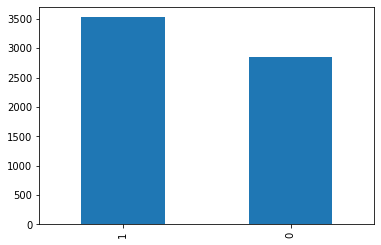

In [ ]:
df.b_outcome.value_counts().plot(kind='bar');

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df_clean = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df_clean.head(10)

,outcome,sex,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke,hosp,b_outcome
0,live,f,63,85,n,x,n,y,y,n,n,y,1
1,live,m,59,85,y,x,n,y,n,n,n,y,1
2,live,m,68,85,n,n,n,y,n,n,n,y,1
3,live,m,46,85,n,c,n,n,n,n,n,y,1
4,dead,m,48,85,n,n,y,n,n,y,n,y,0
5,live,f,55,85,n,c,n,y,y,n,n,y,1
6,live,m,56,85,n,x,n,y,n,n,n,y,1
7,live,f,68,85,y,nk,nk,y,nk,y,n,y,1
8,live,m,69,85,n,n,n,y,y,n,n,y,1
9,live,f,64,85,n,x,n,y,n,y,n,y,1


In [ ]:

# Separate input features (X) and target variable (y)
y = df_clean.b_outcome
X = df_clean.drop(['b_outcome', 'outcome'], axis=1)

In [ ]:
df_clean['outcome']

0       live
1       live
2       live
3       live
4       dead
        ... 
6362    live
6363    live
6364    live
6365    live
6366    live
Name: outcome, Length: 6367, dtype: object

In [ ]:
print(X.shape)
print(y.shape)
print(y.value_counts(normalize=True))

(6367, 11)
(6367,)
1    0.553636
0    0.446364
Name: b_outcome, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours


In [ ]:
def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier


In [ ]:
seed = 75

In [ ]:
def paint(models):
  for modelo in models:
    plt.plot(modelo.fpr,modelo.tpr,label=modelo.name + ", auc="+str(modelo.auc))
    plt.legend(loc=4)
  plt.legend()

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('lr', LogisticRegression(random_state=seed)))
	level0.append(('cart', DecisionTreeClassifier(random_state=seed)))
	level0.append(('svm', SVC(random_state=seed)))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = LogisticRegression(random_state=seed)
	# define the stacking ensemble

	return level0, level1

In [ ]:
def create_model():
# create model
	model = Sequential()
	model.add(Dense(26, input_dim=19, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from types import SimpleNamespace
from sklearn.ensemble import StackingClassifier


models = []
models.append(('LR', LogisticRegression(random_state=seed, C=0.01, penalty='l2', solver='liblinear')))
models.append(('SVC-R', SVC(kernel='rbf', random_state=seed, C=0.1, gamma=0.1)))
models.append(('STK', StackingClassifier(estimators=get_stacking()[0], final_estimator=get_stacking()[1], cv=5)))
models.append(('BC-SVC', SVC(kernel='poly', degree=8, random_state=seed)))
models.append(('BC', BaggingClassifier(LogisticRegression(random_state=seed, C=0.01, penalty='l2', solver='newton-cg'),n_estimators = 40,random_state = seed)))
models.append(('GB', GradientBoostingClassifier(random_state=seed)))
models.append(('RFC', RandomForestClassifier(n_estimators = 10, random_state=seed)))
models.append(('XGB', XGBClassifier(learning_rate=0.1, 
                                      n_estimators=10, 
                                      max_depth=5, 
                                      min_child_weight=2, 
                                      objective="binary:logistic", 
                                      subsample=0.9, 
                                      colsample_bytree=0.8, 
                                      random_state=seed)))
models.append(('KC', KerasClassifier(build_fn=create_model, epochs=10, batch_size=1, verbose=0)))



# models.append(('SVM', SVC()))

In [ ]:
model = SVC()
param_grid = {'clf__C': [0.1,1], 'clf__gamma': [1,0.1,0.01,0.001],'clf__kernel': ['rbf', 'poly', 'sigmoid']}

scaler = RobustScaler()
pipeline = Pipeline([
    ('trans', ctransformer),
    ('norm', scaler),
    ('clf', model)
])

cv = KFold(n_splits=10, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
results = []
results_roc = []
names = []
importants = []

name, model = models[0]
    
scaler = RobustScaler()
pipeline = make_pipeline(ctransformer, model)

cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_results = cross_val_score(model, X=df_dummies, y=y, cv=cv_technique, scoring='accuracy', n_jobs=-1, error_score='raise')
# proba = cross_val_predict(pipeline, X, y, cv=cv_technique, method='predict_proba')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

results.append(cv_results)
names.append(name)
# importants.append(pd.DataFrame({'feature':list(X.columns),'feature_importance':[abs(i) for i in model.coef_[0]]}))

pipeline.fit(X,y)
resultado = pipeline.score(X, y)
if hasattr(model, 'feature_importances_'):
  importants.append(pd.DataFrame({'feature':list(pipeline[:-1].get_feature_names_out()),'feature_importance':[abs(i) for i in model.feature_importances_]}))
if hasattr(model, 'coef_'):
  importants.append(pd.DataFrame({'feature':list(pipeline[:-1].get_feature_names_out()),'feature_importance':[abs(i) for i in model.coef_[0]]}))

y_pred = pipeline.predict(X)
cm = confusion_matrix(y, y_pred)
# y_pred_proba = pipeline.predict_proba(X)
# fpr, tpr, _ = roc_curve(y.values,  y_pred_proba, pos_label=2)
# auc = roc_auc_score(y, y_pred_proba)
# results_roc.append( SimpleNamespace(fpr = fpr, tpr = tpr, auc = auc, name = name))

# paint(results_roc)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()
# boxplots_algorithms(results, names)
importants

In [ ]:
results = []
names = []
results_roc = []
importants = []

resultados_skb = list()

for name, model in models:
    
    scaler = RobustScaler()
    pipeline = make_pipeline(ctransformer,scaler,model)
    
    cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(pipeline, X=X, y=y, cv=cv_technique, scoring='accuracy')
    # proba = cross_val_predict(pipeline, X, y, cv=cv_technique, method='predict_proba')

    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
    results.append(cv_results)
    names.append(name)

    pipeline.fit(X,y)
    resultado = pipeline.score(X, y)

    if hasattr(model, 'feature_importances_'):
      importants.append(pd.DataFrame({'feature':list(pipeline[:-1].get_feature_names_out()),'feature_importance':[abs(i) for i in model.feature_importances_]}))
    if hasattr(model, 'coef_'):
      importants.append(pd.DataFrame({'feature':list(pipeline[:-1].get_feature_names_out()),'feature_importance':[abs(i) for i in model.coef_[0]]}))


    resultados_skb.append(resultado)
    y_pred = pipeline.predict(X)
    cm = confusion_matrix(y, y_pred)

    # y_pred_proba = model.predict_proba(X)[::,1]
    # fpr, tpr, _ = roc_curve(y,  y_pred_proba)
    # auc = roc_auc_score(y, y_pred_proba)
 
    # results_roc.append( SimpleNamespace(fpr = fpr, tpr = tpr, auc = auc, name = name))

 
    print(cm)
# paint(results_roc)
boxplots_algorithms(results, names)


In [ ]:
importants[0].merge(importants[0]).merge(importants[0]).merge(importants[0])

In [ ]:
pd_importants = pd.concat(importants, axis=1)


In [ ]:
pd_importants.plot(kind="bar", figsize=(20,10))

In [ ]:
df_dummies = pd.get_dummies(X, columns=['sex', 'premi', 'smstat','diabetes', 'highbp', 'hichol', 'angina', 'stroke', 'hosp'], drop_first=True)

In [ ]:
df_dummies.shape

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

selector = SelectKBest(score_func=f_classif, k=10)
fit = selector.fit(df_dummies, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(df_dummies)
# summarize selected features
names = df_dummies.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
model = LogisticRegression()
param_solver = ['newton-cg', 'lbfgs', 'liblinear']
param_range_C = [100, 10, 1.0, 0.1, 0.01]
param_penalty =  ['l1', 'l2']

grid_params_lr = [{'clf__penalty': param_penalty,
        'clf__C': param_range_C,
        'clf__solver': param_solver}] 

scaler = RobustScaler()
pipeline = Pipeline([
    ('trans', ctransformer),
    ('norm', scaler),
    ('clf', LogisticRegression())
])

cv = KFold(n_splits=10, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_params_lr, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# name, model = models[7]

print(name)
param_solver = ['newton-cg', 'lbfgs', 'liblinear']
param_range_C = [100, 10, 1.0, 0.1, 0.01]
param_penalty =  ['l1', 'l2']

params = {'BC__n_estimators': [40, 42],
        'BC__base_estimator__penalty': param_penalty,
        'BC__base_estimator__C': param_range_C,
        'BC__base_estimator__solver': param_solver}

rl = LogisticRegression()
bc = BaggingClassifier(base_estimator=rl, oob_score=True, random_state=1) #n_estimators=70, random_state=1)


scaler = RobustScaler()
pipeline = Pipeline([
    ('trans', ctransformer),
    ('norm', scaler),
    ('BC', bc)
])

cv = KFold(n_splits=10, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator=pipeline, param_grid=params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
model = RandomForestClassifier()

param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]

scaler = RobustScaler()
pipeline = Pipeline([
    ('trans', ctransformer),
    ('norm', scaler),
    ('clf', model)
])

cv = KFold(n_splits=10, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
model = GradientBoostingClassifier()

grid_params = {
    "clf__n_estimators":[5,50,250,500],
    "clf__max_depth":[1,3,5,7,9],
    "clf__learning_rate":[0.01,0.1,1,10,100]
}

scaler = RobustScaler()
pipeline = Pipeline([
    ('trans', ctransformer),
    ('norm', scaler),
    ('clf', model)
])

cv = KFold(n_splits=10, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator=pipeline, param_grid=grid_params, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.878909 using {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 500}
0.553635 (0.011238) with: {'clf__learning_rate': 0.01, 'clf__max_depth': 1, 'clf__n_estimators': 5}
0.855033 (0.014699) with: {'clf__learning_rate': 0.01, 'clf__max_depth': 1, 'clf__n_estimators': 50}
0.855033 (0.014699) with: {'clf__learning_rate': 0.01, 'clf__max_depth': 1, 'clf__n_estimators': 250}
0.878123 (0.013261) with: {'clf__learning_rate': 0.01, 'clf__max_depth': 1, 'clf__n_estimators': 500}
0.553635 (0.011238) with: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 5}
0.877180 (0.013354) with: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50}
0.878123 (0.013736) with: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 250}
0.878909 (0.013387) with: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 500}
0.553635 (0.011238) with: {'clf__learning_rate': 0.01, 'clf__max_depth': 5, 'clf__n_estimator

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from keras.layers import Dropout

In [ ]:
def create_model_keras(optimizer='adam',
                 dropout=0.1):
    model = Sequential()
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=optimizer,
    metrics=['accuracy'])
    return model

In [ ]:
model =  KerasClassifier(build_fn=create_model, epochs=10, batch_size=5, verbose=0)

nn_param_grid = {
    'clf__epochs': [2, 3, 5, 10],
    'clf__batch_size':[1, 3, 5]
}

scaler = RobustScaler()
pipeline = Pipeline([
    ('trans', ctransformer),
    ('norm', scaler),
    ('clf', model)
])

cv = KFold(n_splits=3, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator=pipeline, param_grid=nn_param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:

parameters = {
    'xgb__max_depth': range (2, 10, 1),
    'xgb__n_estimators': range(10, 220, 40),
    'xgb__learning_rate': [0.1, 0.01, 0.05]
}

name, model = models[10]

print(name)
    
scaler = RobustScaler()
pipeline = Pipeline([
    ('trans', ctransformer),
    ('norm', scaler),
    ('xgb', XGBClassifier())
])

# pipeline = make_pipeline(ctransformer,scaler, XGBClassifier())

cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed)

# GridSearchCV(pipeline, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
search = GridSearchCV(pipeline, param_grid=parameters, 
                       cv=cv_technique, scoring='accuracy')
search.fit(X,y)


In [ ]:
model = XG

nn_param_grid = {
    'clf__epochs': [2, 3, 5, 10],
    'clf__batch_size':[1, 3, 5]
}

scaler = RobustScaler()
pipeline = Pipeline([
    ('trans', ctransformer),
    ('norm', scaler),
    ('xgb', XGBClassifier())
])

cv = KFold(n_splits=3, shuffle=True, random_state=seed)
grid_search = GridSearchCV(estimator=pipeline, param_grid=nn_param_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:

print(search.best_score_)
print(search.best_estimator_)

In [ ]:

parametros = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 6, 12, 24, 48], 
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 3]
}

model = DecisionTreeClassifier(random_state=seed)

scaler = RobustScaler()
pipeline = make_pipeline(ctransformer, model)

cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed)
cv_results = cross_val_score(pipeline, X=X, y=y, cv=cv_technique, scoring='accuracy', n_jobs=-1, error_score='raise')

pipeline.fit(X,y);
resultado = pipeline.score(X, y)
if hasattr(model, 'feature_importances_'):
  importants.append(pd.DataFrame({'feature':list(pipeline[:-1].get_feature_names_out()),'feature_importance':[abs(i) for i in model.feature_importances_]}))
if hasattr(model, 'coef_'):
  importants.append(pd.DataFrame({'feature':list(pipeline[:-1].get_feature_names_out()),'feature_importance':[abs(i) for i in model.coef_[0]]}))

y_pred = pipeline.predict(X)
cm = confusion_matrix(y, y_pred)

gsearch = GridSearchCV(pipeline, param_grid=parametros, 
                       cv=cv_technique, scoring='accuracy')

In [ ]:
cm

In [ ]:
y_pred

In [ ]:

gsearch.fit(X,y)